Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import glob
import os

# code to add to import from optichill folder
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from optichill import bas_filter

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Winter 2016-17 Training Data

Trained plant with 2016-17 November, December, and January minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2016-11.csv', 'Plt1 m 2016-12.csv', 'Plt1 m 2017-01.csv']
lst_test = [
    'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv',
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv',
    'Plt1 m 2017-11.csv', 'Plt1 m 2017-12.csv', 'Plt1 m 2018-01.csv',
    'Plt1 m 2018-02.csv', 'Plt1 m 2018-03.csv', 'Plt1 m 2018-04.csv'
]

In [3]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2016-12.csv']
['../../Plt1\\Plt1 m 2017-01.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 23414 points and 412 dimensions.
A CDWP3SPD_Alarm was noted and 17 datapoints were removed from the dataset.
A CDWP4Failed was noted and 17 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 12763 datapoints were removed from the dataset.
A CDWP5Failed was noted and 12763 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 15962 datapoints were removed from the dataset.
A CH3_CHWSTSP_Alarm was noted and 15962 datapoints were removed from the dataset.
A CH3ALARM was noted and 16146 datapoints were removed from the dataset.
A CH3F was noted and 16146 datapoints were removed from the dataset.
A CH4_CHWSTSP_Alarm was noted and 16146 datapoints were remo

(49498, 191)

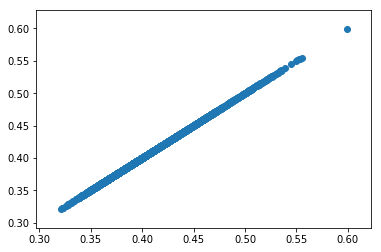

In [4]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

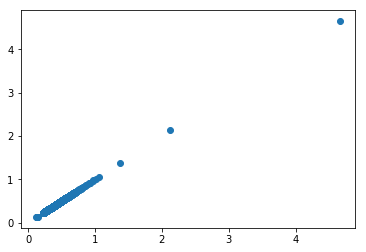

In [5]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [6]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [7]:
model = GradientBoostingRegressor(**params)

In [8]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [9]:
xtrain.shape

(2981, 190)

In [10]:
ytrain.shape

(2981,)

In [11]:
model.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
ypred = model.predict(xtest)

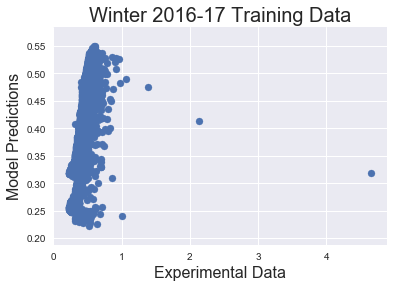

In [24]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Winter 2016-17 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_winter_plt1_2016_17.png', bbox_inches='tight')

R2 value

In [14]:
test_score = r2_score(ytest, ypred)
test_score

0.7411109319623379

Feature Importance

In [15]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [16]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [17]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,CH4F
2,0.000000,CH4ALARM
3,0.000000,CH4_CHWSTSP_Alarm
4,0.000000,CH3Tons
5,0.000000,CH3SURGE
6,0.000000,CH3SBoolean
7,0.000000,CH3S
8,0.000000,CH3PctLoad
9,0.000000,CH4SBoolean


In [23]:
df_feats.to_csv('Feat_imp_winter_test_plt1_2016_17.csv')